## Import packages

In [186]:
import numpy as np
import pandas as pd
import datetime as dt

from matplotlib import pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

## Read csv

In [187]:
df = pd.read_csv("../ib-data/nyse/DDD.csv")

# Parse strings to datetime object
df['date']  = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

## Datetime features

In [188]:
def generate_timestamp_features(df):
    
    ### This set values should uniquely identify a record
    df['year'] = df['date'].dt.month
    df['monthOfYear'] = df['date'].dt.month
    df['dayOfMonth'] = df['date'].dt.day
    df['hourOfDay'] = df['date'].dt.hour
    df['minuteOfHour'] = df['date'].dt.minute
    
    ###################################################################################################################
    
    ### Day of week
    df['dayOfWeek'] = df['date'].dt.dayofweek
    ### Day of year
    df['dayOfYear'] = df['date'].dt.dayofyear
    ### Week of year
    df['weekOfYear'] = df['date'].dt.week
    
    ###################################################################################################################
    
    cal = calendar()
    holidays = cal.holidays(start=df['date'].min() - dt.timedelta(days=1), end=df['date'].max() + dt.timedelta(days=1))

    ### Holiday
    df['isHoliday'] = df['date'].isin(holidays)
    df['prevDayIsHoliday'] = (df['date'] - dt.timedelta(days=1)).isin(holidays)
    df['nextDayIsHoliday'] = (df['date'] + dt.timedelta(days=1)).isin(holidays)

    ### Convert to int
    df['isHoliday'] = df['isHoliday'].astype(int)
    df['prevDayIsHoliday'] = df['prevDayIsHoliday'].astype(int)
    df['nextDayIsHoliday'] = df['nextDayIsHoliday'].astype(int)
    
    ###################################################################################################################
    
    df = df[['date', 
             'year', 'monthOfYear', 'dayOfMonth', 'hourOfDay', 'minuteOfHour',
             'dayOfWeek', 'dayOfYear', 'weekOfYear', 'isHoliday', 'prevDayIsHoliday', 
             'open', 'high', 'low', 'close', 'volume','barCount', 'average']]
    
    return df


In [189]:
df = generate_timestamp_features(df)

df.columns

Index(['date', 'year', 'monthOfYear', 'dayOfMonth', 'hourOfDay',
       'minuteOfHour', 'dayOfWeek', 'dayOfYear', 'weekOfYear', 'isHoliday',
       'prevDayIsHoliday', 'open', 'high', 'low', 'close', 'volume',
       'barCount', 'average'],
      dtype='object')

In [192]:
df

,date,year,monthOfYear,dayOfMonth,hourOfDay,minuteOfHour,dayOfWeek,dayOfYear,weekOfYear,isHoliday,prevDayIsHoliday,open,high,low,close,volume,barCount,average
0,2015-01-06 22:30:00,1,1,6,22,30,1,6,2,0,0,30.925,31.070,30.820,31.050,-1,-1,-1.0
1,2015-01-06 22:35:00,1,1,6,22,35,1,6,2,0,0,31.050,31.340,30.940,30.950,-1,-1,-1.0
2,2015-01-06 22:40:00,1,1,6,22,40,1,6,2,0,0,30.950,31.140,30.945,31.120,-1,-1,-1.0
3,2015-01-06 22:45:00,1,1,6,22,45,1,6,2,0,0,31.120,31.130,30.875,30.950,-1,-1,-1.0
4,2015-01-06 22:50:00,1,1,6,22,50,1,6,2,0,0,30.950,30.970,30.865,30.905,-1,-1,-1.0
5,2015-01-06 22:55:00,1,1,6,22,55,1,6,2,0,0,30.905,30.905,30.610,30.610,-1,-1,-1.0
6,2015-01-06 23:00:00,1,1,6,23,0,1,6,2,0,0,30.610,30.630,30.505,30.530,-1,-1,-1.0
7,2015-01-06 23:05:00,1,1,6,23,5,1,6,2,0,0,30.530,30.540,30.410,30.435,-1,-1,-1.0
8,2015-01-06 23:10:00,1,1,6,23,10,1,6,2,0,0,30.435,30.570,30.410,30.570,-1,-1,-1.0
9,2015-01-06 23:15:00,1,1,6,23,15,1,6,2,0,0,30.570,30.705,30.555,30.610,-1,-1,-1.0


## Set Datetime Index (Optional)

In [193]:
# Set datetime column as index
# df = df.set_index('date')

In [194]:
df.index

RangeIndex(start=0, stop=78257, step=1)

In [195]:
df.values

array([[Timestamp('2015-01-06 22:30:00'), 1, 1, ..., -1, -1, -1.0],
       [Timestamp('2015-01-06 22:35:00'), 1, 1, ..., -1, -1, -1.0],
       [Timestamp('2015-01-06 22:40:00'), 1, 1, ..., -1, -1, -1.0],
       ..., 
       [Timestamp('2019-01-05 04:40:00'), 1, 1, ..., -1, -1, -1.0],
       [Timestamp('2019-01-05 04:45:00'), 1, 1, ..., -1, -1, -1.0],
       [Timestamp('2019-01-05 04:50:00'), 1, 1, ..., -1, -1, -1.0]], dtype=object)

## Plotting

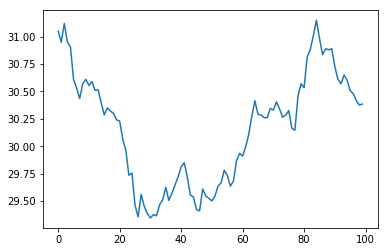

In [196]:
plt.plot(df['close'][0:100])
plt.show()

## Generate New Dataset

In [214]:
import glob
import os

In [218]:
nyse_csv_paths = sorted(glob.glob("../ib-data/nyse/*.csv"))
nasdaq_csv_paths = sorted(glob.glob("../ib-data/iex/*.csv"))

#### NYSE

In [216]:
for i in range(len(nyse_csv_paths)):
    path = nyse_csv_paths[i]
    
    # read csv
    df = pd.read_csv(path)

    # Parse strings to datetime object
    df['date']  = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    
    # generate features
    df = generate_timestamp_features(df)
    
    # save to new file
    PATH_NAME = "../ib-data/nyse-features/" + os.path.basename(path)
    df.to_csv(path_or_buf=PATH_NAME, index=False)
    
    # print message
    print( str(i + 1) + "/" + str(len(nyse_csv_paths)) + " completed.")

1/170 completed.
2/170 completed.
3/170 completed.
4/170 completed.
5/170 completed.
6/170 completed.
7/170 completed.
8/170 completed.
9/170 completed.
10/170 completed.
11/170 completed.
12/170 completed.
13/170 completed.
14/170 completed.
15/170 completed.
16/170 completed.
17/170 completed.
18/170 completed.
19/170 completed.
20/170 completed.
21/170 completed.
22/170 completed.
23/170 completed.
24/170 completed.
25/170 completed.
26/170 completed.
27/170 completed.
28/170 completed.
29/170 completed.
30/170 completed.
31/170 completed.
32/170 completed.
33/170 completed.
34/170 completed.
35/170 completed.
36/170 completed.
37/170 completed.
38/170 completed.
39/170 completed.
40/170 completed.
41/170 completed.
42/170 completed.
43/170 completed.
44/170 completed.
45/170 completed.
46/170 completed.
47/170 completed.
48/170 completed.
49/170 completed.
50/170 completed.
51/170 completed.
52/170 completed.
53/170 completed.
54/170 completed.
55/170 completed.
56/170 completed.
5

#### NASDAQ

In [219]:
for i in range(len(nasdaq_csv_paths)):
    path = nasdaq_csv_paths[i]
    
    # read csv
    df = pd.read_csv(path)

    # Parse strings to datetime object
    df['date']  = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    
    # generate features
    df = generate_timestamp_features(df)
    
    # save to new file
    PATH_NAME = "../ib-data/iex-features/" + os.path.basename(path)
    df.to_csv(path_or_buf=PATH_NAME, index=False)
    
    # print message
    print( str(i + 1) + "/" + str(len(nasdaq_csv_paths)) + " completed.")

1/1 completed.
